In [1]:
import os
import pickle
import numpy

# Functions from other notebook file.
from ipynb.fs.full.shared_functions_server import *

In [2]:
# Move one directory back to the project root.
os.chdir("..")

In [3]:
# Suppress tensorflow log messages.
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

---

In [4]:
# GLOBALS
STORED_MODEL = 'model-info/t-net'
SERIALIZED_TRAINING = r'model-info/t-net-training'

In [5]:
# Open serialized training history data.
with open(SERIALIZED_TRAINING, 'rb') as input_file:
            history = pickle.load(input_file, encoding='bytes')

In [6]:
# GLOBALS
PAD_SIZE = 20
TICK_FONT = 15
LABEL_FONT = 20

TRAINING_ACCURACY = history['acc']
VALIDATION_ACCURACY = history['val_acc']

TRAINING_LOSS = history['loss']
VALIDATION_LOSS = history['val_loss']

EPOCHS = range(0, 50)

ACCURACY_FIGURE = 'T-NET-accuracy.png'
LOSS_FIGURE = 'T-NET-loss.png'

---
## Evaluate Model History

In [7]:
validation_score = VALIDATION_ACCURACY[-1] # get the last entry
validation_score = round(validation_score * 100, 2)
print('Validation accuracy (latest): {}%'.format(validation_score))

training_score = TRAINING_ACCURACY[-1] # get the last entry
training_score = round(training_score * 100, 2)
print('Training accuracy (latest): {}%'.format(training_score))

Validation accuracy (latest): 91.91%
Training accuracy (latest): 97.45%


---

In [8]:
validation_score = VALIDATION_LOSS[-1] # get the last entry
validation_score = round(validation_score, 2)
print('Validation loss (latest): {}'.format(validation_score))

training_score = TRAINING_LOSS[-1] # get the last entry
training_score = round(training_score, 2)
print('Training loss (latest): {}'.format(training_score))

Validation loss (latest): 0.37
Training loss (latest): 0.08


---
## Accuracy Figure

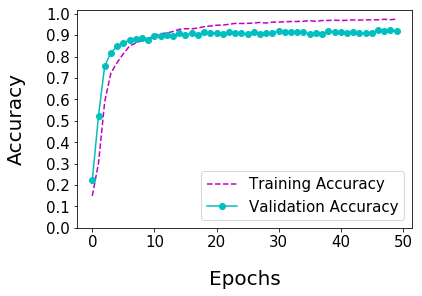

In [15]:
pyplot.plot(EPOCHS, TRAINING_ACCURACY, 'm--', label='Training Accuracy')
pyplot.plot(EPOCHS, VALIDATION_ACCURACY, 'co-', label='Validation Accuracy')

pyplot.xlabel('Epochs', fontsize=LABEL_FONT, labelpad=PAD_SIZE)
pyplot.xticks(fontsize=TICK_FONT)

pyplot.ylabel('Accuracy', fontsize=LABEL_FONT, labelpad=PAD_SIZE)
pyplot.yticks(numpy.arange(0, 1.1, step=0.1), fontsize=TICK_FONT)

pyplot.legend(loc=4, prop={'size': 15})

acc_fig = pyplot.gcf()
acc_fig.savefig(ACCURACY_FIGURE, dpi=400, bbox_inches='tight')

---
## Loss Figure

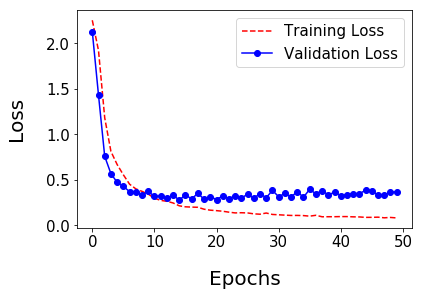

In [17]:
pyplot.plot(EPOCHS, TRAINING_LOSS, 'r--', label='Training Loss')
pyplot.plot(EPOCHS, VALIDATION_LOSS, 'bo-', label='Validation Loss')

pyplot.xlabel('Epochs', fontsize=LABEL_FONT, labelpad=PAD_SIZE)
pyplot.xticks(fontsize=TICK_FONT)

pyplot.ylabel('Loss', fontsize=LABEL_FONT, labelpad=PAD_SIZE)
pyplot.yticks(fontsize=TICK_FONT)

pyplot.legend(loc=1, prop={'size': 15})

loss_fig = pyplot.gcf()
loss_fig.savefig(LOSS_FIGURE, dpi=400, bbox_inches='tight')

---
## Model Architecture

In [18]:
model = models.load_model(STORED_MODEL)
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "T-NET"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 110, 100, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 55, 50, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 55, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 25, 32)        0         
_________________________________________________________________
flatten 